## Hello there! The goal of this Time Series project would be to analyze Tesla's stock trend using Alpha Vantage, comparing the Simple Moving Averages with the actual Closing Prices. "Alpha Vantage Inc. is a leading provider of free APIs for realtime and historical data on stocks and cryptocurrencies."

## I will aim to demonstrate both the code and the stock market aspect, in a way that a non-technical or inexperienced audience will understand! 

In [17]:
# Make the necessary imports immediately. This is good convention and will reduce any future headaches.
# Pandas to collect our data in a dataframe
# Alpha Vantage module to actually collect/manipulate the data
# Matplotlib/Plotly/Chart Studio's new libraries for Data Visualization!

import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import chart_studio as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [18]:
# Here we are simply connecting to Chart Studio (Plotly's new online service).
# The online services are completely FREE. Simply input your username and API key.
chart_studio.tools.set_credentials_file(username='aladin.feratovic', api_key='vWYy7MFd2cIQUkNVqOtd')

In [19]:
# Necessary code to allow our Chart Studio visualizations to be publically available online.
chart_studio.tools.set_config_file(world_readable=True,
                                 sharing='public')

In [20]:
# Similar to what we did earlier; this is our API key for Alpha Vantage's stock market API. Also FREE.
api_key = 'X29H06HO2X1S1RC9'

## Here we are basically pulling the Daily Stock prices of Tesla and instantiating variables to be converted to Pandas dataframes. We do so by 'plugging' in our API keys and choosing Pandas as the format for the required parameters.

In [21]:
timesrs = TimeSeries(key=api_key, output_format='pandas')
data_timesrs, meta_data_timesrs = timesrs.get_daily(symbol='TSLA', outputsize='full')

techInd = TechIndicators(key=api_key, output_format='pandas')
data_techInd, meta_data_techInd = techInd.get_sma(symbol='TSLA', interval='daily', time_period=10, 
                                                  series_type='close')

In [22]:
data_timesrs.head(4)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2010-06-29,19.00,24.9984,17.54,23.89,18766300.0
2010-06-30,25.79,30.4190,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.0998,18.71,19.20,5139800.0


In [23]:
# This code is used to change the name of our Closing price column from '4. close to Closing Price'
# Remember to set the inplace parameter to True! Otherwise it will not take effect.
data_timesrs.rename(columns={'4. close':'Closing Price'},inplace=True)

## In the following code we are converting our prior datasets into Pandas dataframes which will make the Visualizations much easier. We also match their indexes and their shapes, making the number of observations (rows) equal among both dataframes. Otherwise, we'd encounter an error if trying to plot them a graph.

In [24]:
df1 = data_techInd.iloc[1::]
data_timesrs = data_timesrs.iloc[10:]
df2 = data_timesrs['Closing Price']
df1.index = df2.index

print (df1.shape[0], df2.shape[0])

2324 2324


In [25]:
data_techInd.head(2)

,SMA
date,
2010-07-13,19.084
2010-07-14,18.679


In [26]:
# We are now combining both of our dataframes using the Concatenation method! 
total_df = pd.concat([df1, df2], axis=1)
print(total_df.head(10))

               SMA  Closing Price
date                             
2010-07-14  18.679          19.84
2010-07-15  18.285          19.89
2010-07-16  18.153          20.64
2010-07-19  18.424          21.91
2010-07-20  18.843          20.30
2010-07-21  19.285          20.22
2010-07-22  19.639          21.00
2010-07-23  20.028          21.29
2010-07-26  20.418          20.95
2010-07-27  20.659          20.55


### As you probably noticed, our index (row of column names) is not lining up properly. We can fix that problem with an easy Data Cleaning technique which is to Reset the Index!

In [31]:
total_df.reset_index(inplace=True)
total_df['date'] = pd.to_datetime(total_df['date'])
total_df.head(10)

,index,date,SMA,Closing Price
0,0,2010-07-14,18.679,19.84
1,1,2010-07-15,18.285,19.89
2,2,2010-07-16,18.153,20.64
3,3,2010-07-19,18.424,21.91
4,4,2010-07-20,18.843,20.30
5,5,2010-07-21,19.285,20.22
6,6,2010-07-22,19.639,21.00
7,7,2010-07-23,20.028,21.29
8,8,2010-07-26,20.418,20.95
9,9,2010-07-27,20.659,20.55


## Finally, time for some Data Visualization!! The first of our graphs will be created using the Matplotlib library. This is a simple, easy to read static graph comparing Tesla's Closing Price (how their stock moved) versus the Simple Moving Average (how their stock was predicted to move).

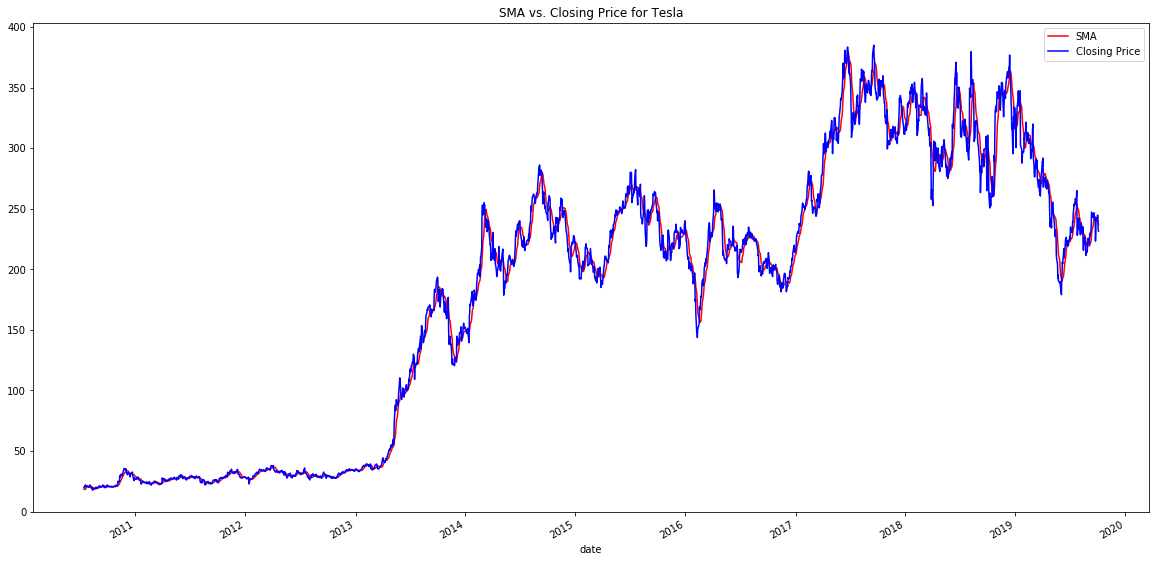

In [28]:
# Create a figure of "subplots". This is an easy method of plotting more than 1 line on our graph.
# Next we add 2 Line plots of data from our total_df dataframe, and a Title to describe the graph.

f, ax = plt.subplots(1, figsize=(20,10))
total_df.plot(kind='line', x='date', y='SMA', color='red', ax=ax)
total_df.plot(kind='line', x='date', y='Closing Price', color='blue', ax=ax)
plt.title('SMA vs. Closing Price for Tesla')
plt.show()

## To take our Visualizations even further, we will stay true to Time Series Analysis by creating an interactive graph using Plotly! This will allow us to have more freedom in our graph, to easily compare the Closing Price and the SMA. The graph is Interactive in the sense that you can Zoom in as well as Hover on any line using your mouse, and you will immediately be able to identify Tesla's stock price at that section of time.

In [30]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=total_df['date'], 
        y=total_df['SMA'], 
        name='SMA',
        line=dict(color='firebrick', width=2)))

fig.add_trace(
    go.Line(
        x=total_df['date'],
        y=total_df['Closing Price'],
        name ='Closing Price',
        mode="lines",
        line=go.scatter.Line(color="#99CCFF"),
        showlegend=False))
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

C:\Users\admir\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Now for the Time Series of Stock analysis. Although I am certainly not a professional when it comes to the Stock Marget world, I know a few principles which can used here in practice. For example, whenever the Closing Price is SIGNIFICANTLY lower than the SMA, that would be an ideal time to "Buy-In". In this situation, the stock price is at an unusually high amount of Volatility, and is bound to "correct" itself by increasing closer to the SMA. This also works in Vice-versa; if the Closing Price is SIGNIFICANTLY higher than the SMA, that is the time to sell!